In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import random
import os

import torch
import torch.nn as nn
import torch.nn.functional as F

from utils import *

from models import * 
import torch.optim as optim

from sklearn import preprocessing

from Experiments import *

seed = 0 

def set_seeds(seed): 
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) 

set_seeds(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

%load_ext autoreload
%autoreload 2


cuda


In [77]:
# dataset = "traffic"
# data_file = "traffic_data/data.csv"
# hier_file = "traffic_data/agg_mat.csv"

# data = pd.read_csv(data_file, index_col=0)
# agg_mat_df = pd.read_csv(hier_file, index_col=0)

# dataset = "tourism"
# data_file = "tourism_data/data.csv"
# hier_file = "tourism_data/agg_mat.csv"

dataset = "labor"
data_file = "labor/data.csv"
hier_file = "labor/agg_mat.csv"

data = pd.read_csv(data_file, index_col=0)
agg_mat_df = pd.read_csv(hier_file, index_col=0)
base_agg_mat = agg_mat_df.values

In [78]:
maximum = np.max(data.values)
data = (data / maximum).values

In [136]:
batch_size = data.shape[0]
context_window = 5
train_split = 0.8
val_split = 0.1

noise = 0.2
num_runs = 10
n_epochs = 1000

base_agg_mat = agg_mat_df.values

In [137]:
hidden_size = 128

In [138]:
# params = {'n_series':data.shape[1], 'hidden_size':5, 'lr':1e-3, 'n_epochs':n_epochs, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
#           'coherency_loss':True, 'profhit':False, 'coherency_weight':1, 'project':False, "noise":noise}

# noisy_data = utils.add_noise(data.copy(), base_agg_mat, params['noise'], seed=0)
# coherency_results_cv, all_coh_res = cv(BaseModel, base_agg_mat, data, params)

In [87]:
# coherency_results_cv

In [88]:
# # PROFHiT

# params = {'n_series':data.shape[1], 'hidden_size':128, 'lr':1e-3, 'n_epochs':n_epochs, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
#           'coherency_loss':False, 'profhit':True, 'coherency_weight':None, 'project':False, "noise":noise}

# # noisy_data = utils.add_noise(data.copy(), params['noise'], seed=0)
# profhit_results_cv, all_profhit_res = cv(BaseModel, base_agg_mat, data, params)

In [140]:
# Base model 

params = {'n_series':data.shape[1], 'hidden_size':hidden_size, 'lr':1e-3, 'n_epochs':n_epochs, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False,'profhit':False, 'project':False, "noise":noise, "coherency_weight":1}

base_results, names, base_losses = repeat_noise_exp(BaseModel, base_agg_mat, data, params, num_runs)

run 0


100%|██████████| 1000/1000 [00:36<00:00, 27.61it/s]


run 1


100%|██████████| 1000/1000 [00:33<00:00, 29.81it/s]


run 2


100%|██████████| 1000/1000 [00:27<00:00, 36.69it/s]


run 3


100%|██████████| 1000/1000 [00:33<00:00, 30.08it/s]


run 4


100%|██████████| 1000/1000 [00:32<00:00, 30.75it/s]


run 5


100%|██████████| 1000/1000 [00:32<00:00, 31.01it/s]


run 6


100%|██████████| 1000/1000 [00:32<00:00, 31.04it/s]


run 7


100%|██████████| 1000/1000 [00:33<00:00, 29.60it/s]


run 8


100%|██████████| 1000/1000 [00:33<00:00, 29.58it/s]


run 9


100%|██████████| 1000/1000 [00:33<00:00, 29.59it/s]


In [141]:
# Coherency loss

params = {'n_series':data.shape[1], 'hidden_size':hidden_size, 'lr':1e-3, 'n_epochs':n_epochs, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':True, 'profhit':False, 'coherency_weight':1e-4, 'project':False, "noise":noise}
coherency_results, names, coherency_losses = repeat_noise_exp(BaseModel, base_agg_mat, data, params, num_runs)

run 0


100%|██████████| 1000/1000 [00:32<00:00, 30.35it/s]


run 1


100%|██████████| 1000/1000 [00:33<00:00, 29.64it/s]


run 2


100%|██████████| 1000/1000 [00:29<00:00, 34.23it/s]


run 3


100%|██████████| 1000/1000 [00:38<00:00, 26.26it/s]


run 4


100%|██████████| 1000/1000 [00:35<00:00, 28.54it/s]


run 5


100%|██████████| 1000/1000 [00:38<00:00, 25.96it/s]


run 6


100%|██████████| 1000/1000 [00:37<00:00, 26.86it/s]


run 7


100%|██████████| 1000/1000 [00:33<00:00, 30.06it/s]


run 8


100%|██████████| 1000/1000 [00:36<00:00, 27.19it/s]


run 9


100%|██████████| 1000/1000 [00:43<00:00, 22.90it/s]


In [142]:
# PROFHiT

params = {'n_series':data.shape[1], 'hidden_size':hidden_size, 'lr':1e-3, 'n_epochs':n_epochs, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False, 'profhit':True, 'coherency_weight':1e-4, 'project':False, "noise":noise}
profhit_results, names, profhit_losses = repeat_noise_exp(BaseModel, base_agg_mat, data, params, num_runs)

run 0


100%|██████████| 1000/1000 [00:41<00:00, 24.10it/s]


run 1


100%|██████████| 1000/1000 [00:33<00:00, 29.45it/s]


run 2


100%|██████████| 1000/1000 [00:37<00:00, 27.02it/s]


run 3


100%|██████████| 1000/1000 [00:32<00:00, 30.44it/s]


run 4


100%|██████████| 1000/1000 [00:31<00:00, 31.98it/s]


run 5


100%|██████████| 1000/1000 [00:33<00:00, 29.94it/s]


run 6


100%|██████████| 1000/1000 [00:32<00:00, 30.60it/s]


run 7


100%|██████████| 1000/1000 [00:33<00:00, 29.71it/s]


run 8


100%|██████████| 1000/1000 [00:33<00:00, 30.01it/s]


run 9


100%|██████████| 1000/1000 [00:34<00:00, 28.63it/s]


In [143]:
# Projection 

params = {'n_series':data.shape[1], 'hidden_size':hidden_size, 'lr':1e-3, 'n_epochs':n_epochs, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False, 'profhit':False, 'project':True, "noise":noise, "coherency_weight":1}
projection_results, names, projection_losses = repeat_noise_exp(BaseModel, base_agg_mat, data, params, num_runs)

run 0


100%|██████████| 1000/1000 [00:35<00:00, 28.39it/s]


run 1


100%|██████████| 1000/1000 [00:30<00:00, 33.23it/s]


run 2


100%|██████████| 1000/1000 [00:35<00:00, 28.01it/s]


run 3


100%|██████████| 1000/1000 [00:34<00:00, 29.17it/s]


run 4


100%|██████████| 1000/1000 [00:33<00:00, 29.50it/s]


run 5


100%|██████████| 1000/1000 [00:33<00:00, 29.48it/s]


run 6


100%|██████████| 1000/1000 [00:31<00:00, 31.82it/s]


run 7


100%|██████████| 1000/1000 [00:32<00:00, 30.92it/s]


run 8


100%|██████████| 1000/1000 [00:33<00:00, 29.73it/s]


run 9


100%|██████████| 1000/1000 [00:33<00:00, 29.69it/s]


In [144]:
def plot_results(results, names, get, model_name, color):
    mean_res = get_mean(results, names)
    std_res  = get_std(results, names)    
    plt.plot(range(mean_res.shape[0]), mean_res[get], label=model_name, color=color)
    # plt.errorbar(range(mean_res.shape[0]), mean_res[get], std_res[get], 
    #              label=model_name,
    #              capsize=5)

In [145]:
np.save("results/raw/{}_base_noise_{}.npy".format(dataset, noise), base_results)
np.save("results/raw/{}_projection_noise_{}.npy".format(dataset, noise), projection_results)
np.save("results/raw/{}_profhit_noise_{}.npy".format(dataset, noise), profhit_results)
np.save("results/raw/{}_coherency_noise_{}.npy".format(dataset, noise), coherency_results)

In [146]:
# base_results = np.load("results/raw/{}_base_noise_{}.npy".format(dataset, noise))
# projection_results = np.load("results/raw/{}_projection_noise_{}.npy".format(dataset, noise))
# profhit_results = np.load("results/raw/{}_profhit_noise_{}.npy".format(dataset, noise))
# coherency_results = np.load("results/raw/{}_coherency_noise_{}.npy".format(dataset, noise))

In [147]:
GET = 2
print("BASE:", base_results[:,:,GET].mean(0), base_results[:,:,GET].std(0))
print("COH :", coherency_results[:,:,GET].mean(0), coherency_results[:,:,GET].std(0))
print("PROJ:", projection_results[:,:,GET].mean(0), projection_results[:,:,GET].std(0))
print("PROF:", profhit_results[:,:,GET].mean(0), profhit_results[:,:,GET].std(0))

BASE: [2.50264319 0.93270345 0.54292316 0.33916671] [0.473312   0.1487066  0.07459765 0.00765997]
COH : [1.0987877  0.50722886 0.42102387 0.33555101] [1.94302758e-01 4.90312655e-02 3.01758713e-02 9.77503635e-06]
PROJ: [1.95865291 0.69099711 0.49411465 0.34077655] [0.29416407 0.10302971 0.07484289 0.00158463]
PROF: [1.54345278 0.61925108 0.43318179 0.33557819] [2.28849073e-01 8.94927420e-02 5.49296530e-02 2.77133693e-05]


In [148]:
GET = 1
mean_values = [base_results[:,:,GET].mean(axis=0), coherency_results[:,:,GET].mean(axis=0), profhit_results[:,:,GET].mean(axis=0), projection_results[:,:,GET].mean(axis=0)]
GET = 2
mean_values_wmape = [base_results[:,:,GET].mean(axis=0), coherency_results[:,:,GET].mean(axis=0), profhit_results[:,:,GET].mean(axis=0), projection_results[:,:,GET].mean(axis=0)]
names_ = ['Base', 'Network Coherency', 'PROFHiT', "Projection"]

latex_table = r"""
\begin{tabular}{|c|c|c|c|c|}
\toprule
Model & \multicolumn{4}{c}{{Hierarchy level}} \\
 & 1 & 2 & 3 & 4 \\ 
\midrule
""" + "\n".join(
    [f"{names_[i]} & {mean_values[i][0]:.4f} / {mean_values_wmape[i][0]:.4f} & {mean_values[i][1]:.4f} / {mean_values_wmape[i][1]:.4f} & {mean_values[i][2]:.4f} / {mean_values_wmape[i][2]:.4f} & {mean_values[i][3]:.4f} / {mean_values_wmape[i][3]:.4f} \\\\ "
     for i in range(len(mean_values))]
) + r"""
\bottomrule
\end{tabular}
"""
print(latex_table)


\begin{tabular}{|c|c|c|c|c|}
\toprule
Model & \multicolumn{4}{c}{{Hierarchy level}} \\
 & 1 & 2 & 3 & 4 \\ 
\midrule
Base & 0.0053 / 2.5026 & 0.0059 / 0.9327 & 0.0076 / 0.5429 & 0.1263 / 0.3392 \\ 
Network Coherency & 0.0010 / 1.0988 & 0.0016 / 0.5072 & 0.0042 / 0.4210 & 0.1118 / 0.3356 \\ 
PROFHiT & 0.0021 / 1.5435 & 0.0025 / 0.6193 & 0.0048 / 0.4332 & 0.1158 / 0.3356 \\ 
Projection & 0.0033 / 1.9587 & 0.0031 / 0.6910 & 0.0058 / 0.4941 & 0.1190 / 0.3408 \\ 
\bottomrule
\end{tabular}



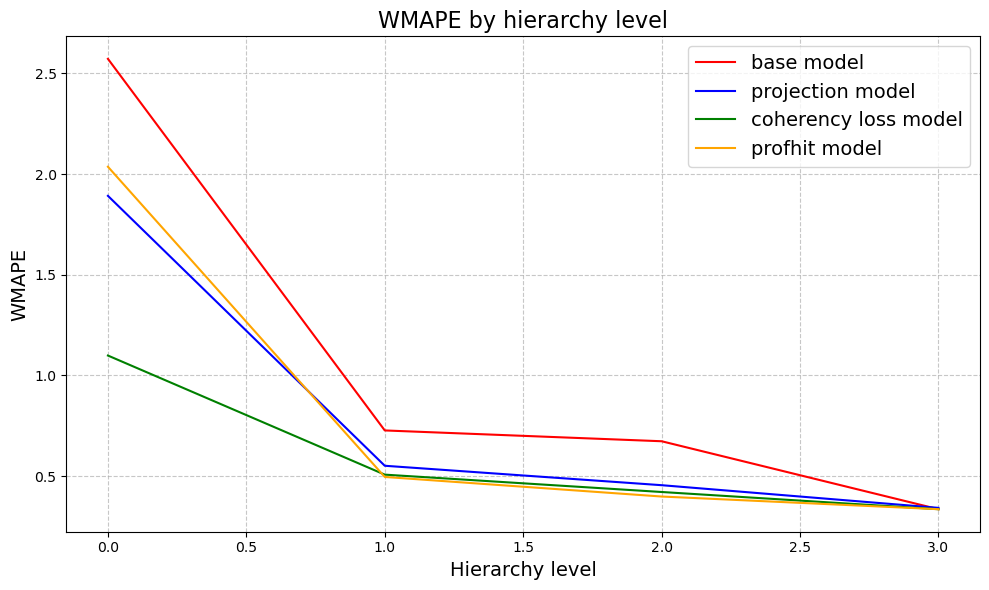

In [149]:
# get = "MSE"
# plot_results(base_results, names, get, "base model", color='red')
# plot_results(projection_results, names, get, "projection model", color='blue')
# # plot_results(profhit_results, names, get, "profhit model", color='green')
# plot_results(np.array([coherency_results.to_numpy()]), names, get, "coherency loss model", color='orange')
# plot_results(np.array([profhit_results.to_numpy()]), names, get, "profhit model", color='green')
# plt.legend()
# plt.savefig('results/{}_wmape_{}.png'.format(dataset, noise))

import os
import numpy as np
import matplotlib.pyplot as plt


GET = "WMAPE"

# Enhanced plot
plt.figure(figsize=(10, 6))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('{} by hierarchy level'.format(GET), fontsize=16)
plt.xlabel('Hierarchy level', fontsize=14)
plt.ylabel(GET, fontsize=14)

start = 0
end = 1
r = range(start,end)
plot_results(base_results[r,:,:], names, GET, "base model", color='red')
plot_results(projection_results[r,:,:], names, GET, "projection model", color='blue')
plot_results(coherency_results, names, GET, "coherency loss model", color='green')
# plt.plot(range(coherency_results_cv.shape[0]), coherency_results_cv[GET], label='coherency loss model', color='green')
plot_results(profhit_results[r,:,:], names, GET, "profhit model", color='orange')

plt.legend(fontsize=14)
plt.tight_layout()
# plt.ylim(0, 0.006)
plt.savefig('results/{}_{}_{}.png'.format(dataset, GET, noise))
plt.show()


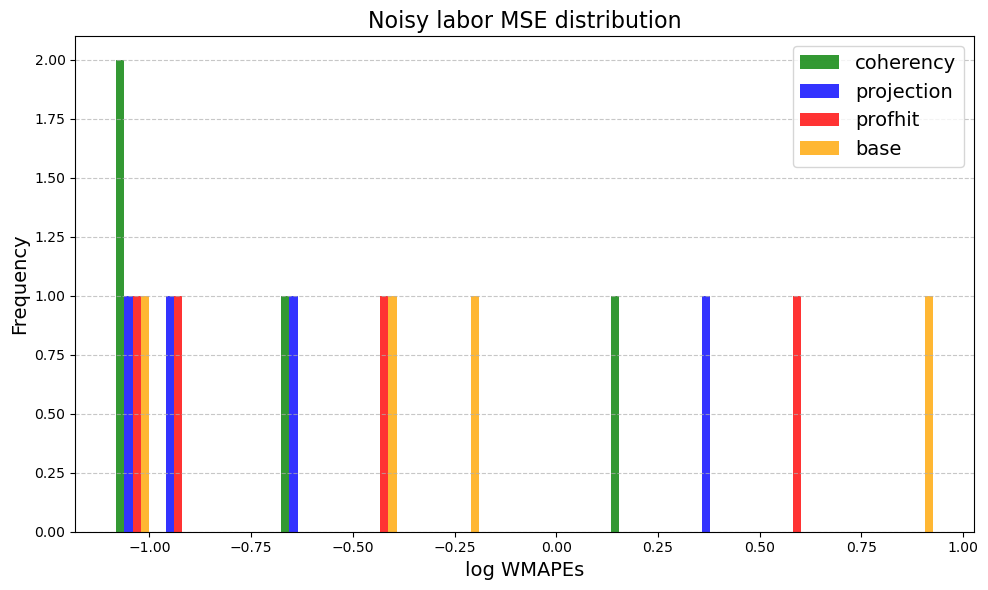

In [130]:

GET = 2

# Enhanced plot aesthetics
plt.figure(figsize=(10, 6))
plt.hist([
    np.log(coherency_results[r,:,GET].flatten()),
    np.log(projection_results[r,:,GET].flatten()),
    np.log(profhit_results[r,:,GET].flatten()),
    np.log(base_results[r,:,GET].flatten()),    
    # (coherency_results[start:end,:,GET].flatten()),
    # (projection_results[start:end,:,GET].flatten()),
    # (profhit_results[start:end,:,GET].flatten()),
    # (base_results[start:end,:,GET].flatten()[base_results[start:end,:,GET].flatten() < 0.001]),    
],
    label=['coherency', 'projection', 'profhit', 'base'],
    color=['green', 'blue', 'red', 'orange'],
    bins=20,
    alpha=0.8,
    # edgecolor='black',
    linewidth=1.2)

plt.title('Noisy {} MSE distribution'.format(dataset), fontsize=16)
plt.xlabel('log WMAPEs', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.show()

plt.savefig("results/{}_MSE_noise_distribution_{}.png".format(dataset, noise))

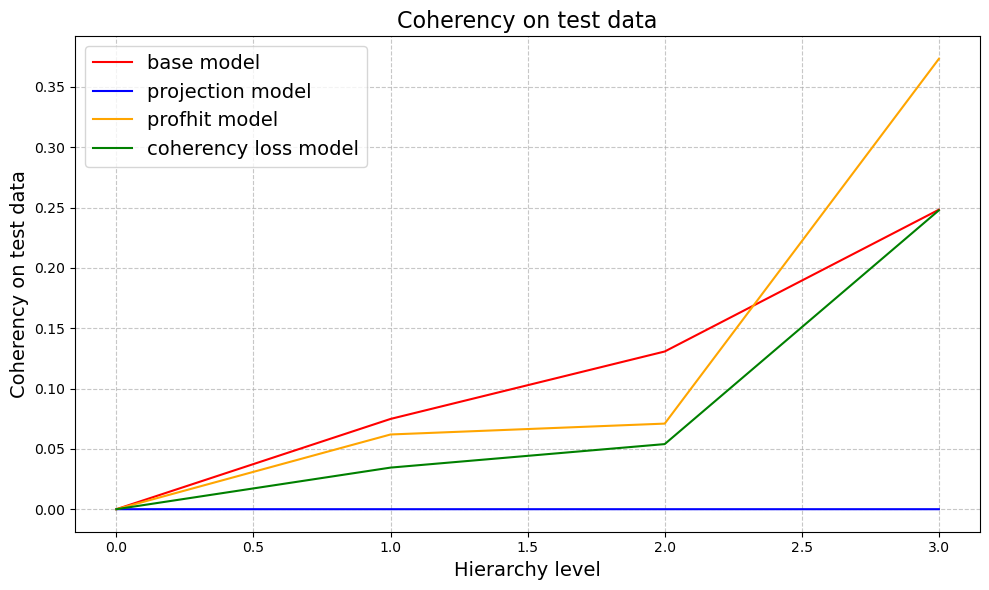

In [131]:
get = "Coherency"

# Enhanced plot
plt.figure(figsize=(10, 6))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Coherency on test data', fontsize=16)
plt.xlabel('Hierarchy level', fontsize=14)
plt.ylabel('Coherency on test data', fontsize=14)

plot_results(base_results, names, get, "base model", color='red')
plot_results(projection_results, names, get, "projection model", color='blue')
plot_results(profhit_results, names, get, "profhit model", color='orange')
plot_results(coherency_results, names, get, "coherency loss model", color='green')
# plot_results(np.array([profhit_results.to_numpy()]), names, get, "profhit model", color='green')
# plot_results(np.array([coherency_results.to_numpy()]), names, get, "coherency loss model", color='orange')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('results/{}_coherency_{}.png'.format(dataset, noise))

In [150]:
get = 0
print(names[get])
base_results[r,1:,get].mean(), coherency_results[r,1:,get].mean(), profhit_results[r,1:,get].mean(), projection_results[r,1:,get].mean()

Coherency


(0.18060350542267165,
 0.11213566487034161,
 0.1400280420978864,
 5.654112319083046e-07)

In [151]:
base_results[r,1:,get].std(), coherency_results[r,1:,get].std(), profhit_results[r,1:,get].std(), projection_results[r,1:,get].std()

(0.129740430373694,
 0.09614172032219889,
 0.07796086607287474,
 5.717440988124328e-07)

In [108]:
base_results[:,:,0]

array([[0.        , 0.07482667, 0.13072044, 0.24824862]])

In [115]:
coherency_results

array([[[0.        , 0.00382917, 2.3234992 ],
        [0.01733211, 0.00362128, 0.78255802],
        [0.02305824, 0.00649398, 0.48914707],
        [0.08187106, 0.12129866, 0.33928776]]])